# EDA 간단한 실습 with matplotlib & seaborn

- 앞에서 배운 seaborn 과 matplotlib 으로 EDA를 해보겠습니다. kaggle에 있는 것과 동일합니다.(for beginner).     
  https://www.kaggle.com/c/kobe-bryant-shot-selection/data  
  
- matplotlib와 seaborn 코드는 암기할 필요가 없습니다! 나중에 프로젝트 하실때 이 코드를 보면서 참고할 수 있을 정도면 됩니다.
- matplotlib 참고사이트:
https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/

### 본 Kaggle Competition의 목적은 'shot_made_flag' 컬럼의 빈 값을 예측하는 것입니다.
즉, 코비 브라이언트가 던진 슛이 성공했는지를 다른 많은 데이터들을 통해서 예측해야 합니다.  
하지만 EDA 시간이니까 예측을 하진 않을거고, 데이터의 특징만 살펴볼 것입니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

## ① 데이터의 형태 파악하기

In [3]:
# 한 화면에 보이는 column의 최대 개수를 늘려줘요
pd.set_option('max_columns', 99)

In [4]:
# csv 파일을 읽어와서 pandas dataframe으로 만들어요
df = pd.read_csv('kobe.csv')
df.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,0,2000-01,52,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,0,2000-01,5,2,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,0,2000-01,12,12,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,0,2000-01,36,12,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [5]:
# (row의 개수, column의 개수)
df.shape

(30697, 25)

## ② 각 변수 파악하기

* action_type
* combined_shot_type
* game_event_id
* game_id
* lat
* loc_x
* loc_y
* lon
* minutes_remaining
* period
* playoffs
* season 
* seconds_remaining
* shot_distance
* shot_made_flag (this is what you are predicting)
* shot_type
* shot_zone_area
* shot_zone_basic
* shot_zone_range
* team_id
* team_name
* game_date
* matchup
* opponent
* shot_id

변수가 너무 많아요! 필요 없는 변수들은 뭐가 있을지 찾아봅시다

In [6]:
not_needed = []
# 지우고 싶은 변수 넣어서 한 번에 지웁시다

#### Action type and combined shot type

코비가 던진 슛의 타입에 대한 정보입니다.

In [7]:
# df.unique : 겹치는 원소들 하나로 취급, df 안에 어떤 원소가 있는지 볼 수 있음
print(df['action_type'].unique()) 
print()
print(df['combined_shot_type'].unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

#### Game event and game IDs

경기의 고유번호와, 이 경기에서 몇번째로 일어난 이벤트인지에 대한 정보입니다.

In [8]:
not_needed += ['game_event_id', 'game_id']
# 슛 성공여부 판단에 불필요해보여요
# 물론 사용할 수도 있지만, 여기서는 지우겠습니다

#### loc_x, loc_y, lat, lon

슛을 쏜 위치에 대한 정보입니다.

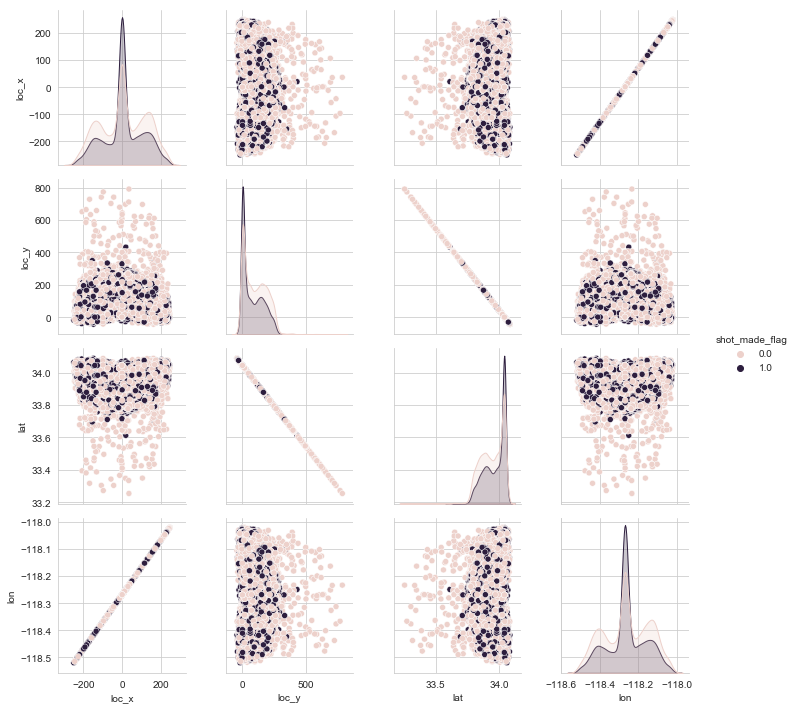

In [9]:
sns.set_style('whitegrid') # 격자를 만들어줘요. 이 코드가 없으면 아래 그래프들도 격자 없이 나와요
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon'], hue='shot_made_flag')

In [17]:
not_needed += ['lon', 'lat']
# lon & lat 의 정보가 loc_x & loc_y 의 정보와 겹치기 때문에 삭제
# 이처럼 상관관계가 강한 변수들은 불필요하기 때문에 삭제하면 좋습니다

#### Minutes and seconds remaining

지금 슛이 이번 쿼터에서 몇분 몇초 남았을 때 쏜 슛인지에 대한 정보입니다.

In [18]:
# NBA는 한쿼터에 12분입니다. 따라서 남은 분이 0~11분인 것을 볼 수 있습니다.

print(sorted(df["minutes_remaining"].unique()))
print(sorted(df["seconds_remaining"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [19]:
df['time_remaining'] = 60 * df.loc[:, 'minutes_remaining'] + df.loc[:, 'seconds_remaining']
# 분과 초를 합쳐서 time_remaining 으로 새로운 변수를 만들었습니다.
# 이처럼 새로운 변수를 만들어서 모델의 성능을 높이기도 합니다.

In [20]:
not_needed.extend(['minutes_remaining', 'seconds_remaining'])

#### Period
지금이 몇쿼터인지에 대한 정보입니다.  
5 이상인 것은 연장전일거에요

In [21]:
df['period'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

#### Playoffs

이 경기가 플레이오프 경기인지 아닌지에 대한 정보입니다.

In [22]:
df['playoffs'].unique()

array([0, 1], dtype=int64)

#### Shot made flag
종속변수입니다! 골을 넣으셨나요?

In [ ]:
df['shot_made_flag'].unique()

In [ ]:
# 총 5000개의 슛 정보를 맞추는 문제였어요. 그래서 nan 데이터가 5000개입니다.
df['shot_made_flag'].isnull().sum()

#### Season
이 경기가 어떤 시즌에 치러진 경기인지에 대한 정보입니다.

In [23]:
df["season"].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [24]:
# object 변수를 numeric 변수로 바꿔줍시다.
# 농구시즌은 겨울-봄 2년에 걸쳐 있지만 앞의 년도로도 다 구분할 수 있겠죠? 그러므로 앞의 년도만 남깁시다.
df['season'] = df['season'].apply(lambda x: x[:4])
df['season'] = pd.to_numeric(df['season'])

In [25]:
df["season"].unique() # 데이터 타입이 int64로 바뀐 것을 확인할 수 있어요

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 1996, 1997, 1998, 1999], dtype=int64)

#### Shot distance
슛을 얼마나 멀리서 쐈는지에 대한 정보입니다.

In [ ]:
print(sorted(df['shot_distance'].unique()))

In [ ]:
# 정수 근삿값이네요.
# 우리에게는 x y 좌표가 있으므로 더 정확한 거리를 구할 수 있습니다.
dist = pd.DataFrame({'true_dist': np.sqrt((df['loc_x']/10)**2 + (df['loc_y']/10)**2), 
                     'shot_dist': df['shot_distance']})
dist.head(10)

In [ ]:
df['shot_distance_'] = dist['true_dist']
not_needed.append('shot_distance')
# 조금 더 정확한 값으로 바꿔줍시다.

#### Shot type
2점슛인지 3점슛인지에 대한 정보입니다.

In [26]:
df['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [27]:
df['3pt_goal'] = df['shot_type'].str.contains('3PT').astype('int')
# 3점슛은 1로 2점슛은 0으로 표시
# 모델에 넣기 위해서 이처럼 카데고리를 실수로 바꿔줍니다 (방법은 매우 다양합니다)
not_needed.append('shot_type')

In [28]:
df['3pt_goal'].tail()

30692    0
30693    0
30694    0
30695    1
30696    0
Name: 3pt_goal, dtype: int32

#### Shot zone: range, area, basic

In [29]:
print(df['shot_zone_range'].unique())
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())

['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


In [30]:
not_needed.append('shot_zone_range')
# shot_distance와 겹치기에 삭제
# 이처럼 겹치는 정보의 변수들은 삭제하기도 합니다

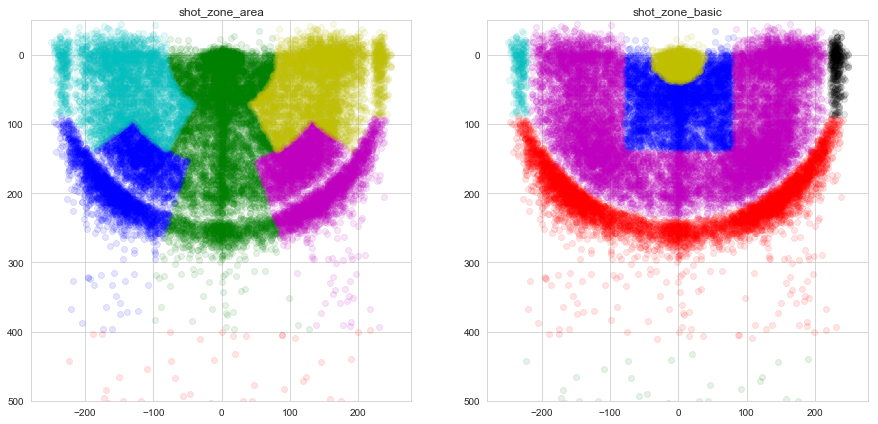

In [31]:
# 이처럼 seaborn으로 그릴 수 없는 커스터마이징한 그래프를 matplotlib으로 그립니다
# 지금은 이해하실 필요는 없고 '오~ 이런게 있구나' 하시면 됩니다 (생각보다 복잡한 그래프는 아님^^)
## 이라고 윗기수 분들이 적어두셨네요ㅎㅎ; 

area_group = df.groupby('shot_zone_area')
basic_group = df.groupby('shot_zone_basic')

plt.subplots(1, 2, figsize=(15, 7), sharey=True)
colors = list('rgbcmyk')

plt.subplot(121)
plt.ylim(500, -50)
plt.title('shot_zone_area')
for i, (_, area) in enumerate(area_group):
    plt.scatter(area['loc_x'], area['loc_y'], alpha=0.1, color=colors[i])
    
plt.subplot(122)
plt.ylim(500, -50)
plt.title('shot_zone_basic')
for i, (_, basic) in enumerate(basic_group):
    plt.scatter(basic['loc_x'], basic['loc_y'], alpha=0.1, color=colors[i])

# area랑 basic을 구역별로 다른 색깔로 넣어서 그래프로 표현한 것입니다! 각 점 하나하나가 슛을 쏜 위치입니다~

#### Team ID and name
코비가 뛴 팀에 대한 정보인데 코비는 21년 내내 한 팀에서만 뛰어서 분석에는 쓸모가 없겠죠?

In [32]:
# 이렇게 LA 레이커스 딱 한팀만 검색됩니다.
print(df['team_id'].unique())
print(df['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [ ]:
# 필요없는 변수 삭제
not_needed.extend(['team_id', 'team_name'])

#### Game date
경기 날짜가 몇 월 며칠인지에 대한 정보입니다.

In [ ]:
df['game_date'].head()

In [ ]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year # pandas에서는 datetime을 지원해서 뒤에 이렇게 붙이는 것만으로 년도가 뽑힙니다
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.dayofweek

not_needed.append('game_date')

# game_date를 년월일로 구분해서 따로따로 넣어주었습니다.

#### Matchup and opponent
상대방에 대한 정보인데, matchup이 @면 원정경기, vs.면 홈경기입니다.

In [ ]:
df[['matchup','opponent']]

In [ ]:
# 마찬가지로 object 변수를 int로 바꿔줍니다.
# vs가 포함되는 문자, 즉 홍경기를 찾아서 1로, 아닌 경기를 0으로 바꿉니다.
df['home_game'] = df['matchup'].str.contains('vs.').astype(int)
not_needed.append('matchup')

In [ ]:
df[['matchup','home_game']]

#### Shot ID
이 슛이 코비가 선수 생활하면서 몇 번째로 쏜 슛인지에 대한 정보입니다.


In [ ]:
df['shot_id']

In [ ]:
# shot_id를 이 df의 인덱스로 설정해줍니다.
df.set_index('shot_id', inplace=True)

In [ ]:
df = df.drop(not_needed, axis=1) # 안 쓸 데이터들 날리기

In [ ]:
# 샘플 10개만 뽑아서 출력해봅시다.
pd.set_option('display.max_columns', None)
random_sample = df.take(np.random.permutation(len(df))[:10])
random_sample.head(10)

## ③ 결측치 확인하기

In [37]:
# kaggle에서 결측치가 없는 아주 깔끔한 데이터를 줬어요
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
time_remaining           0
3pt_goal                 0
dtype: int64

In [38]:
# shot_made_flag가 NaN인 데이터, 즉 맞춰야 할 데이터를 분리해줍시다.
submission_data = df[df['shot_made_flag'].isnull()]
submission_data = submission_data.drop('shot_made_flag', 1) # 0이면 row에서, 1이면 column에서 해당하는 것을 지우겠다는 의미입니다.
submission_data.shape

(5000, 26)

In [39]:
# 5000개 뺀 나머지
data = df[df['shot_made_flag'].notnull()]
data.shape

(25697, 27)

## ④ 종속변수의 분포 확인하기

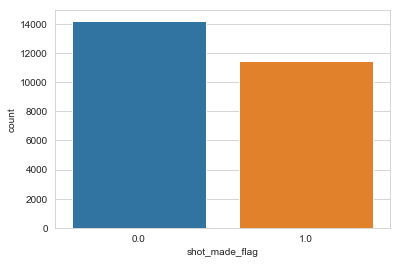

In [40]:
# kobe의 슛 성공 횟수
sns.countplot(x='shot_made_flag', data=data)

In [41]:
data['shot_made_flag'].value_counts() / data['shot_made_flag'].shape

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

## ⑤ 다른 변수들의 분포 확인하기

### time_remaining ( 남은 시간 )

1        622
2        465
3        412
4        379
5        572
        ... 
30691    424
30692    365
30694    208
30695    130
30696     39
Name: time_remaining, Length: 25697, dtype: int64

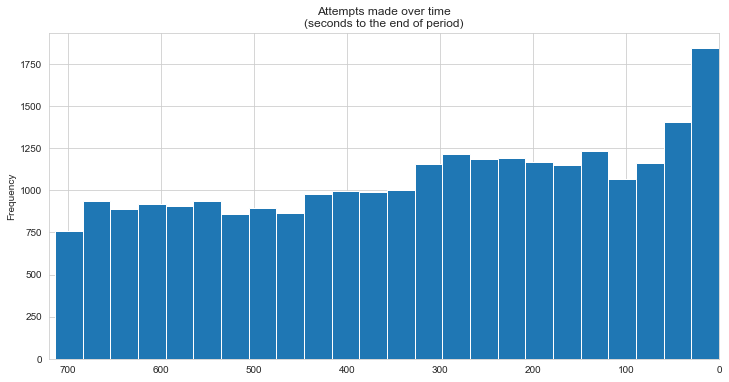

In [42]:
# time에 대한 hist 그래프
data['time_remaining'].plot(kind='hist', bins=24, xlim=(720, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')
data['time_remaining']

In [43]:
last_30 = data[data['time_remaining'] < 30]
last_30['shot_made_flag'].value_counts() / last_30['shot_made_flag'].shape
# 30초 남았을 때 쫄려서 막 던졌나봐요
# last_30처럼 할당 이름을 이해하기 쉽게 만드는 것 중요!

0.0    0.666305
1.0    0.333695
Name: shot_made_flag, dtype: float64

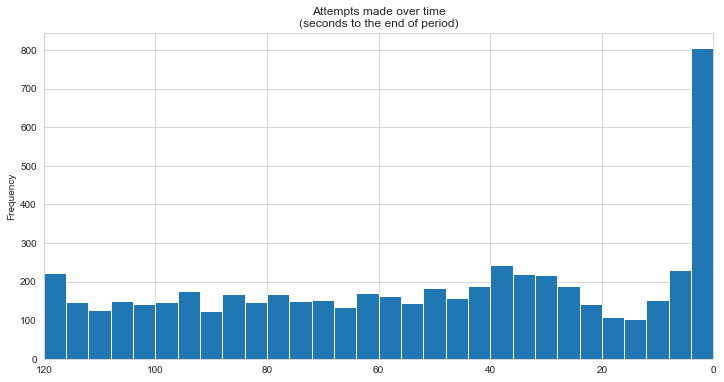

In [44]:
# 2분 이하 남았을 때만 뽑아서 4초 간격으로 히스토그램을 그려봤어요
last_2min  = data[data['time_remaining'] <= 120]
last_2min['time_remaining'].plot(kind='hist', bins=30, xlim=(120, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

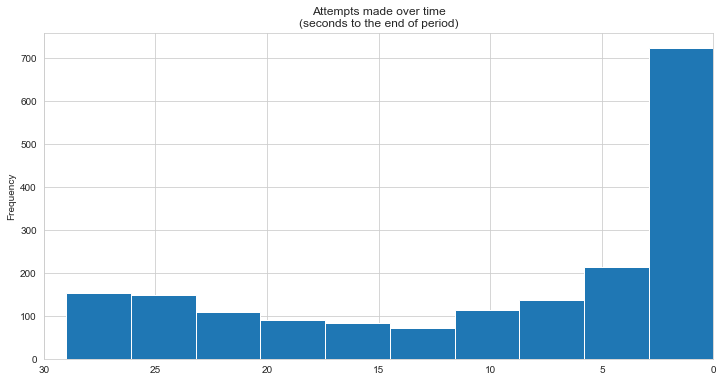

In [45]:
last_30['time_remaining'].plot(kind='hist', bins=10, xlim=(30, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

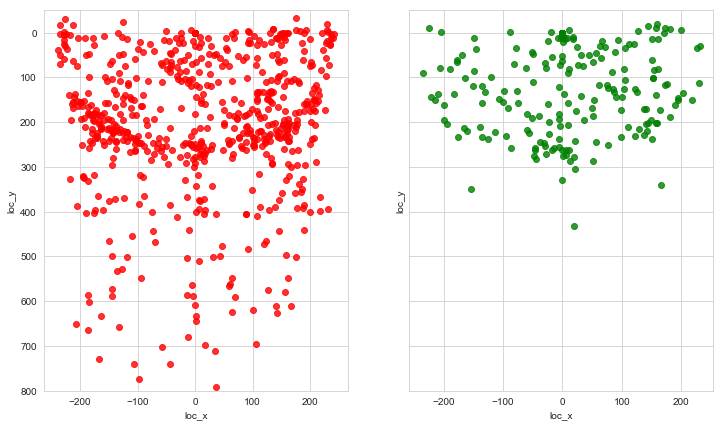

In [46]:
# 5초이하 남았을 때, 슛 위치 분포 그래프(성공, 실패에 따라 나눔)
# 확실히 실패한 경우를 보면 멀리서 던진 경우가 눈에 띄네요
last_5sec_misses = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 0)]
last_5sec_scores = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 1)]


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,7))
ax1.set_ylim(800, -50)

sns.regplot(x='loc_x', y='loc_y', data=last_5sec_misses, fit_reg=False, ax=ax1, color='r')
sns.regplot(x='loc_x', y='loc_y', data=last_5sec_scores, fit_reg=False, ax=ax2, color='g')

### period

In [ ]:
# period에 따라 슛 count
plt.figure(figsize=(12,6))
sns.countplot(x="period", hue="shot_made_flag", data=data)

In [ ]:
# period_accuracy를 파악
period_acc = data['shot_made_flag'].groupby(data['period']).mean()
period_acc.plot(kind='barh', figsize=(12, 6))

### combined_shot_type

In [ ]:
# combined_shot_type 에 따라 슛 count
plt.figure(figsize=(12,6))
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=data)

In [ ]:
# shot_type_accuracy 파악
shot_type_acc = data['shot_made_flag'].groupby(data['combined_shot_type']).mean()
shot_type_acc.plot(kind='barh', figsize=(12, 6))

### action_type

In [ ]:
# action_type 에 따른 슛 count 
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)

In [ ]:
# action_type_accuracy
action_type = data['shot_made_flag'].groupby(data['action_type']).mean()
action_type.sort_values()

action_type.sort_values().plot(kind='barh', figsize=(12, 18))

### season

In [ ]:
# season 에 따른 슛 count
# 2013년에는 부상으로 시즌아웃 예상 / 이처럼 EDA를 하다보면 새로운 사실 발견가능!
plt.figure(figsize=(12,6))
sns.countplot(x="season", hue="shot_made_flag", data=data)

In [ ]:
# season_accuracy 파악
season_acc = data['shot_made_flag'].groupby(data['season']).mean()
season_acc.plot(figsize=(12, 6), title='Accuracy over seasons')

### game_month

In [ ]:
# game_month 에 따른 슛 count
# 6월, 10월은 왜이리 적을까?? 찾아보세용~
plt.figure(figsize=(12,6))
sns.countplot(x="game_month", hue="shot_made_flag", data=data)

In [ ]:
# game_month_accuracy 파악
game_month = data['shot_made_flag'].groupby(data['game_month']).mean()
game_month.plot(kind='barh', figsize=(12, 6))

### game_day ( 요일 )

In [ ]:
# game_day 에 따른 슛 count
plt.figure(figsize=(12,6))
sns.countplot(x="game_day", hue="shot_made_flag", data=data)

In [ ]:
# game_day_accuracy 를 파악
game_day = data['shot_made_flag'].groupby(data['game_day']).mean()
game_day.plot(kind='barh', figsize=(12, 6))

### playoff

In [ ]:
# playoff 에 따른 슛 count
plt.figure(figsize=(12,6))
sns.countplot(x="playoffs", hue="shot_made_flag", data=data)

In [ ]:
# play_off_accuracy 를 파악
playoffs = data['shot_made_flag'].groupby(data['playoffs']).mean()
playoffs.plot(kind='barh', figsize=(12, 2), xlim=(0, 0.50))
# 플레이오프라고 성공률이 떨어지지 않네요 대단한 선수에요 역시

### shot_distance_

In [ ]:
# distance에 따라 구분하여 distance_categorical 을 만듬
distance_bins = np.append(np.arange(0, 31, 3), 300) 
distance_cat = pd.cut(data['shot_distance_'], distance_bins, right=False)

dist_data = data.loc[:, ['shot_distance_', 'shot_made_flag']]
dist_data['distance_cat'] = distance_cat

distance_cat.value_counts(sort=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="distance_cat", hue="shot_made_flag", data=dist_data)
# 어느정도 유의미하게 나누어진듯 합니다

In [ ]:
# distance_accuracy 를 파악
dist_prec = dist_data['shot_made_flag'].groupby(dist_data['distance_cat']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

### shot_zone_area

In [ ]:
# shot_zone_area 에 따른 슛 count
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data)

In [ ]:
# shot_area_accuracy 를 파악
shot_area = data['shot_made_flag'].groupby(data['shot_zone_area']).mean()
shot_area.plot(kind='barh', figsize=(12, 6))

### shot_zone_basic

In [ ]:
# shot_zone_basic 에 따른 슛 count
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=data)

In [ ]:
# shot_zone_accuracy 를 파악
shot_basic = data['shot_made_flag'].groupby(data['shot_zone_basic']).mean()
shot_basic.plot(kind='barh', figsize=(12, 6))

### home_game

In [ ]:
# home_game 에 따른 슛 count
plt.figure(figsize=(12,6))
sns.countplot(x="home_game", hue="shot_made_flag", data=data)

In [ ]:
# shot_basic_accuracy 파악
shot_basic = data['shot_made_flag'].groupby(data['home_game']).mean()
shot_basic.plot(kind='barh', figsize=(12, 2))

### opponent

In [ ]:
# opponent에 따른 슛 count
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data)

In [ ]:
# opponent_accracy 를 파악
opponent = data['shot_made_flag'].groupby(data['opponent']).mean()
opponent.sort_values().plot(kind='barh', figsize=(12,10))

# The End

## Appendix. Pandas Profiling

In [ ]:
# !pip install pandas_profiling

In [ ]:
import pandas_profiling

In [ ]:
pandas_profiling.ProfileReport(df)